In [7]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point,MultiPoint,Polygon
import contextily as ctx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')
# 统计图绘制选项
sns.set(font_scale=1.3)
sns.set_style("white")

In [2]:
data_Wildfire_eachfire_all = pd.read_csv("wildfire_all_properties_data_withgeometry_dropNdvi_20210617.csv")
data_Wildfire_eachfire_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14334 entries, 0 to 14333
Data columns (total 58 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fire_ID              14334 non-null  int64  
 1   Date                 14334 non-null  int64  
 2   AreaHa               14334 non-null  float64
 3   PerimeterM           14334 non-null  float64
 4   air_mean             14334 non-null  float64
 5   air_min              14334 non-null  float64
 6   air_max              14334 non-null  float64
 7   pre_mean             14334 non-null  float64
 8   pre_min              14334 non-null  float64
 9   pre_max              14334 non-null  float64
 10  soilw_mean           14334 non-null  float64
 11  soilw_min            14334 non-null  float64
 12  soilw_max            14334 non-null  float64
 13  air_mean_spring      14334 non-null  float64
 14  air_mean_summer      14334 non-null  float64
 15  air_mean_autumn      14334 non-null 

In [4]:
# data filter
data_Wildfire_eachfire_all_2 = data_Wildfire_eachfire_all.copy()
print(data_Wildfire_eachfire_all_2.shape)
data_Wildfire_eachfire_all_2 = data_Wildfire_eachfire_all_2.drop(index=data_Wildfire_eachfire_all_2.AreaHa[data_Wildfire_eachfire_all_2.AreaHa>10000].index)# >10000
print(data_Wildfire_eachfire_all_2.shape)
data_Wildfire_eachfire_all_2 = data_Wildfire_eachfire_all_2.drop(index=data_Wildfire_eachfire_all_2.AreaHa[data_Wildfire_eachfire_all_2.AreaHa<0.1].index)# <0.1
print(data_Wildfire_eachfire_all_2.shape)

(14334, 58)
(14174, 58)
(13088, 58)


In [5]:
list1 = []
list2 = ["Year","Wild_Freq","Wild_Area(ha)","Wild_Area_mean(ha)","air_mean(DegC)","pre_mean(mm/month)","soilw_mean(mm)","wind_mean(m/s)","slope_mean","NDVI_mean","vegetation"]
for i in range(0,34):
    year = 1982+i
    #data_Wildfire_eachyear_year = data_Wildfire_eachfire_all_2[data_Wildfire_eachfire_all_2["Date"] == year]
    data_Wildfire_eachyear_year = data_Wildfire_eachfire_all[data_Wildfire_eachfire_all["Date"] == year]
    # calculate mean air temperature and gross area
    FireFreq = data_Wildfire_eachyear_year.shape[0]
    wildfire_area_year_sum = data_Wildfire_eachyear_year["AreaHa"].sum()
    wildfire_area_year_mean = wildfire_area_year_sum/FireFreq
    wildfire_temp_year_mean = data_Wildfire_eachyear_year["air_mean"].mean()
    wildfire_rain_year_mean = data_Wildfire_eachyear_year["pre_mean"].mean()
    wildfire_soilw_year_mean = data_Wildfire_eachyear_year["soilw_mean"].mean()
    wildfire_wind_year_mean = data_Wildfire_eachyear_year["wind_mean (m.s++-1)"].mean()
    wildfire_slope_year_mean = data_Wildfire_eachyear_year["Slope_mean"].mean()
    wildfire_NDVI_year_mean = data_Wildfire_eachyear_year["grid_code_mean"].mean()
    wildfire_vegetation_year_mean = data_Wildfire_eachyear_year["Classify"].mean()
    
    list1.append([year,FireFreq,wildfire_area_year_sum,wildfire_area_year_mean,wildfire_temp_year_mean,wildfire_rain_year_mean,wildfire_soilw_year_mean,\
                 wildfire_wind_year_mean,wildfire_slope_year_mean,wildfire_NDVI_year_mean,wildfire_vegetation_year_mean])
data_Wildfire_eachyear =  pd.DataFrame(columns=list2,data=list1)
data_Wildfire_eachyear

,Year,Wild_Freq,Wild_Area(ha),Wild_Area_mean(ha),air_mean(DegC),pre_mean(mm/month),soilw_mean(mm),wind_mean(m/s),slope_mean,NDVI_mean,vegetation
0,1982,366,4.459861e+05,1218.541274,16.232392,56.187432,347.408038,3.149792,7.715843,0.699377,3.814208
1,1983,92,1.391077e+04,151.204001,17.509590,100.116700,435.115928,3.467527,7.704931,0.674169,3.130435
2,1984,471,1.962081e+06,4165.777708,15.211429,97.370606,465.117520,2.967444,7.190661,0.655636,3.598726
3,1985,268,6.409365e+04,239.155422,16.078706,87.027003,421.819132,3.055431,8.098870,0.702666,3.753731
4,1986,569,3.848048e+05,676.282592,16.494695,75.724463,393.174334,2.959643,7.888361,0.729219,3.650264
5,1987,351,1.343331e+05,382.715455,15.292784,78.834319,393.027453,2.906776,8.201899,0.712322,3.871795
6,1988,242,1.171895e+05,484.254312,16.709541,111.917132,496.533311,2.961055,8.161713,0.712435,3.752066
7,1989,280,9.939887e+04,354.995980,16.446375,100.339776,500.459591,3.335270,7.825677,0.729929,3.857143
8,1990,454,3.976019e+05,875.775174,16.393062,108.732136,506.163512,3.084809,7.588482,0.740550,3.533040
9,1991,654,3.160822e+05,483.306111,17.491267,61.354574,375.423034,3.054891,7.963340,0.724915,3.681957


In [9]:
df_Wildfire_eachyear_feature = data_Wildfire_eachyear.copy()
df_Wildfire_eachyear_feature.drop([2],inplace=True)
#df_Wildfire_eachyear_feature.to_csv("./Wildfire_eachyear_feature_2.csv",header=True,index=False)
df_Wildfire_eachyear_feature

,Year,Wild_Freq,Wild_Area(ha),Wild_Area_mean(ha),air_mean(DegC),pre_mean(mm/month),soilw_mean(mm),wind_mean(m/s),slope_mean,NDVI_mean,vegetation
0,1982,366,4.459861e+05,1218.541274,16.232392,56.187432,347.408038,3.149792,7.715843,0.699377,3.814208
1,1983,92,1.391077e+04,151.204001,17.509590,100.116700,435.115928,3.467527,7.704931,0.674169,3.130435
3,1985,268,6.409365e+04,239.155422,16.078706,87.027003,421.819132,3.055431,8.098870,0.702666,3.753731
4,1986,569,3.848048e+05,676.282592,16.494695,75.724463,393.174334,2.959643,7.888361,0.729219,3.650264
5,1987,351,1.343331e+05,382.715455,15.292784,78.834319,393.027453,2.906776,8.201899,0.712322,3.871795
6,1988,242,1.171895e+05,484.254312,16.709541,111.917132,496.533311,2.961055,8.161713,0.712435,3.752066
7,1989,280,9.939887e+04,354.995980,16.446375,100.339776,500.459591,3.335270,7.825677,0.729929,3.857143
8,1990,454,3.976019e+05,875.775174,16.393062,108.732136,506.163512,3.084809,7.588482,0.740550,3.533040
9,1991,654,3.160822e+05,483.306111,17.491267,61.354574,375.423034,3.054891,7.963340,0.724915,3.681957
10,1992,264,2.311176e+04,87.544547,16.774337,88.298828,460.573885,3.032432,8.078813,0.723155,3.719697


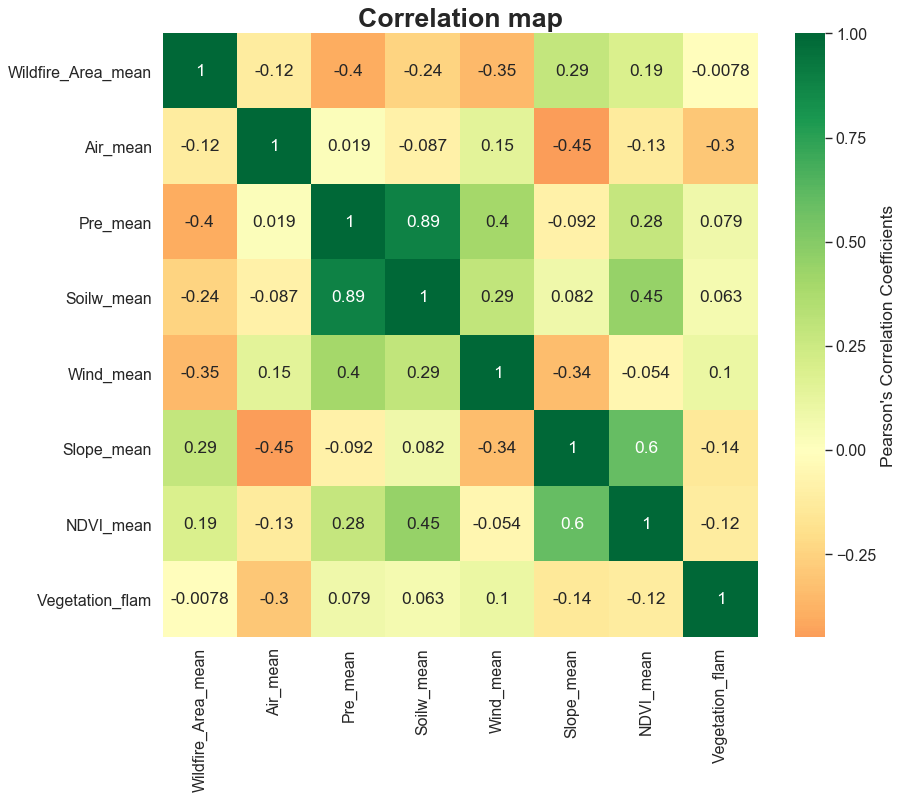

<Figure size 432x288 with 0 Axes>

In [10]:
# seven driven factor
# calculate the Pearson's Correlation Coefficients to explain the correlation between the parameters
def PearsonCorrelation(x,y):
    # number of observations/points 
    n = np.size(x)
    xy_sum = np.sum(x*y)
    x_sum = np.sum(x)
    y_sum = np.sum(y)
    x_squared_sum = np.sum(x*x)
    y_squared_sum = np.sum(y*y)
    r = (n*xy_sum-x_sum*y_sum)/((n*x_squared_sum-x_sum**2)*(n*y_squared_sum-y_sum**2))**0.5
    return (r)

P1 = df_Wildfire_eachyear_feature["Wild_Area_mean(ha)"]
P2 = df_Wildfire_eachyear_feature["air_mean(DegC)"]
P3 = df_Wildfire_eachyear_feature["pre_mean(mm/month)"]
P4 = df_Wildfire_eachyear_feature["soilw_mean(mm)"]
P5 = df_Wildfire_eachyear_feature["wind_mean(m/s)"]
P6 = df_Wildfire_eachyear_feature["slope_mean"]
P7 = df_Wildfire_eachyear_feature["NDVI_mean"]
P8 = df_Wildfire_eachyear_feature["vegetation"]


#ticklabel_str = ["Wildfire_Freq","air_mean(DegC)","pre_mean(mm/month)","soilw_mean(mm)","wind_mean(m/s)","slope_mean","NDVI_mean","vegetation"]
ticklabel_str = ["Wildfire_Area_mean","Air_mean","Pre_mean","Soilw_mean","Wind_mean","Slope_mean","NDVI_mean","Vegetation_flam"]
r_P1P2 = PearsonCorrelation(P1,P2)
r_P1P3 = PearsonCorrelation(P1,P3)
r_P1P4 = PearsonCorrelation(P1,P4)
r_P1P5 = PearsonCorrelation(P1,P5)
r_P1P6 = PearsonCorrelation(P1,P6)
r_P1P7 = PearsonCorrelation(P1,P7)
r_P1P8 = PearsonCorrelation(P1,P8)
r_P2P3 = PearsonCorrelation(P2,P3)
r_P2P4 = PearsonCorrelation(P2,P4)
r_P2P5 = PearsonCorrelation(P2,P5)
r_P2P6 = PearsonCorrelation(P2,P6)
r_P2P7 = PearsonCorrelation(P2,P7)
r_P2P8 = PearsonCorrelation(P2,P8)
r_P3P4 = PearsonCorrelation(P3,P4)
r_P3P5 = PearsonCorrelation(P3,P5)
r_P3P6 = PearsonCorrelation(P3,P6)
r_P3P7 = PearsonCorrelation(P3,P7)
r_P3P8 = PearsonCorrelation(P3,P8)
r_P4P5 = PearsonCorrelation(P4,P5)
r_P4P6 = PearsonCorrelation(P4,P6)
r_P4P7 = PearsonCorrelation(P4,P7)
r_P4P8 = PearsonCorrelation(P4,P8)
r_P5P6 = PearsonCorrelation(P5,P6)
r_P5P7 = PearsonCorrelation(P5,P7)
r_P5P8 = PearsonCorrelation(P5,P8)
r_P6P7 = PearsonCorrelation(P6,P7)
r_P6P8 = PearsonCorrelation(P6,P8)
r_P7P8 = PearsonCorrelation(P7,P8)

Correlation_matrix = np.matrix([[1,r_P1P2,r_P1P3,r_P1P4,r_P1P5,r_P1P6,r_P1P7,r_P1P8],\
                                [r_P1P2,1,r_P2P3,r_P2P4,r_P2P5,r_P2P6,r_P2P7,r_P2P8],\
                                [r_P1P3,r_P2P3,1,r_P3P4,r_P3P5,r_P3P6,r_P3P7,r_P3P8],\
                                [r_P1P4,r_P2P4,r_P3P4,1,r_P4P5,r_P4P6,r_P4P7,r_P4P8],\
                                [r_P1P5,r_P2P5,r_P3P5,r_P4P5,1,r_P5P6,r_P5P7,r_P5P8],\
                                [r_P1P6,r_P2P6,r_P3P6,r_P4P6,r_P5P6,1,r_P6P7,r_P6P8],\
                                [r_P1P7,r_P2P7,r_P3P7,r_P4P7,r_P5P7,r_P6P7,1,r_P7P8],\
                                [r_P1P8,r_P2P8,r_P3P8,r_P4P8,r_P5P8,r_P6P8,r_P7P8,1]
                               ])
plt.figure(figsize=(12,10), dpi= 80)
plt.title("Correlation map",fontsize=24,fontweight="bold")
sns.heatmap(Correlation_matrix, xticklabels=ticklabel_str, yticklabels=ticklabel_str, cmap='RdYlGn', center=0, annot=True,cbar_kws={'label': 'Pearson\'s Correlation Coefficients'})
plt.show()
#plt.savefig("correlation.png")

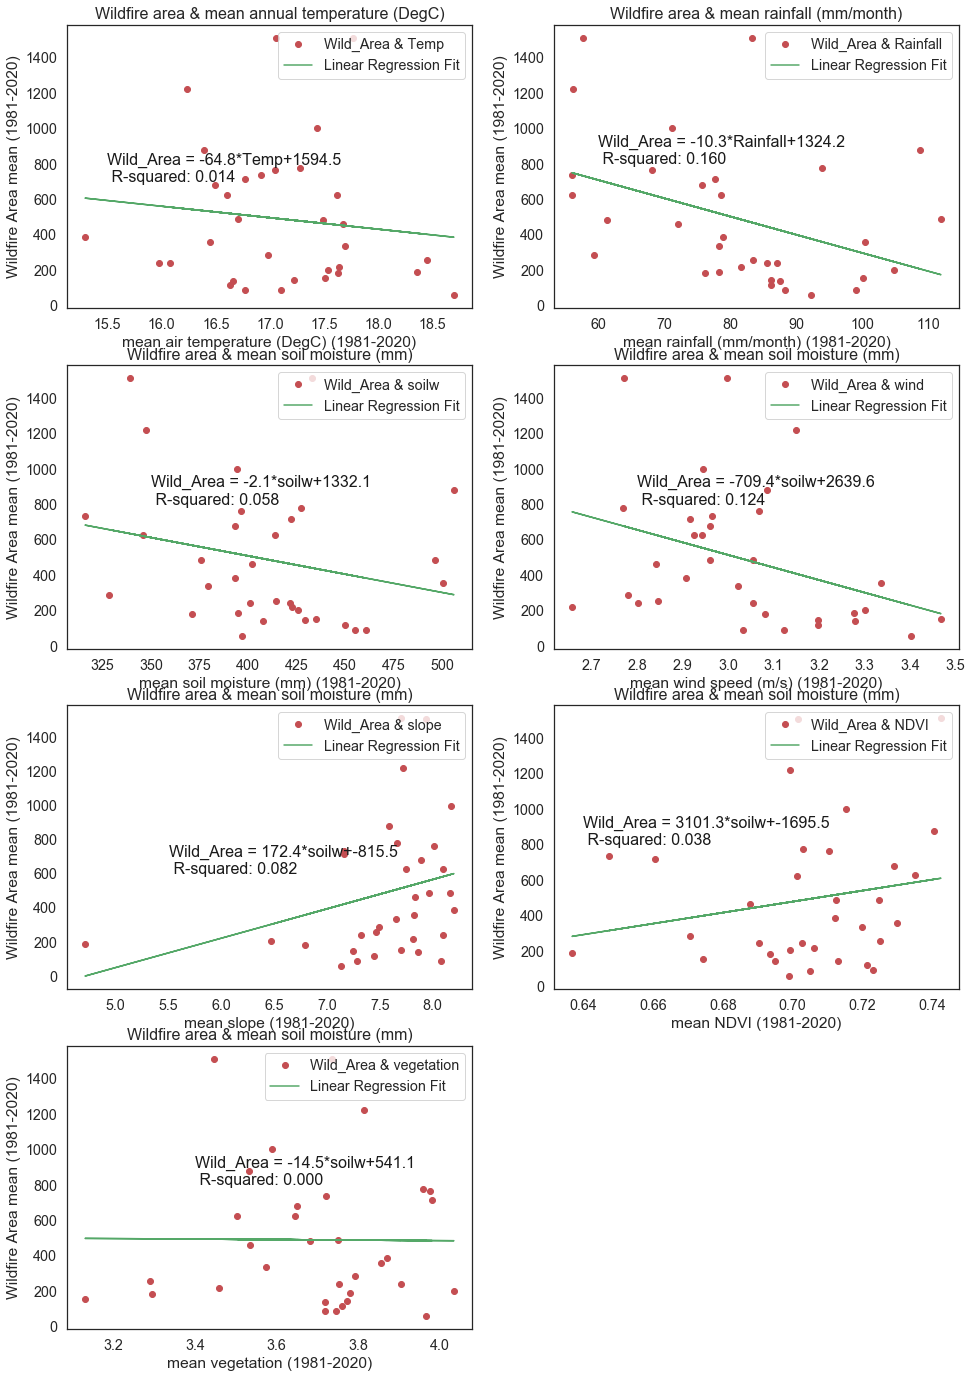

In [12]:
# Linear regression for wildfire frequency and three meteorological factors
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
    
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
    
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
    
    return(b_0, b_1)

P1 = df_Wildfire_eachyear_feature["Wild_Area_mean(ha)"]
P2 = df_Wildfire_eachyear_feature["air_mean(DegC)"]
P3 = df_Wildfire_eachyear_feature["pre_mean(mm/month)"]
P4 = df_Wildfire_eachyear_feature["soilw_mean(mm)"]
P5 = df_Wildfire_eachyear_feature["wind_mean(m/s)"]
P6 = df_Wildfire_eachyear_feature["slope_mean"]
P7 = df_Wildfire_eachyear_feature["NDVI_mean"]
P8 = df_Wildfire_eachyear_feature["vegetation"]
P1_label = "Wildfire Area mean (1981-2020)"
P2_label = "mean air temperature (DegC) (1981-2020)"
P3_label = "mean rainfall (mm/month) (1981-2020)"
P4_label = "mean soil moisture (mm) (1981-2020)"
P5_label = "mean wind speed (m/s) (1981-2020)"
P6_label = "mean slope (1981-2020)"
P7_label = "mean NDVI (1981-2020)"
P8_label = "mean vegetation (1981-2020)"

# Linear regression modeling
(b_0_P1_P2,b_1_P1_P2) = estimate_coef(P2,P1) 
P1_P2_pred = b_0_P1_P2 + b_1_P1_P2*P2
(b_0_P1_P3,b_1_P1_P3) = estimate_coef(P3,P1) 
P1_P3_pred = b_0_P1_P3 + b_1_P1_P3*P3
(b_0_P1_P4,b_1_P1_P4) = estimate_coef(P4,P1) 
P1_P4_pred = b_0_P1_P4 + b_1_P1_P4*P4
(b_0_P1_P5,b_1_P1_P5) = estimate_coef(P5,P1) 
P1_P5_pred = b_0_P1_P5 + b_1_P1_P5*P5
(b_0_P1_P6,b_1_P1_P6) = estimate_coef(P6,P1) 
P1_P6_pred = b_0_P1_P6 + b_1_P1_P6*P6
(b_0_P1_P7,b_1_P1_P7) = estimate_coef(P7,P1) 
P1_P7_pred = b_0_P1_P7 + b_1_P1_P7*P7
(b_0_P1_P8,b_1_P1_P8) = estimate_coef(P8,P1) 
P1_P8_pred = b_0_P1_P8 + b_1_P1_P8*P8

# define a function to calculate the R-squared for each linear regression model
# y: measurement data
# y_pred: predicted data
def R_squared_calculate(y,y_pred):
    y_mean = np.mean(y)
    SSR = 0 # initial Sum of Squares Regression
    SST = 0 # initial Sum of Squares Total
    for y_pred_i in y_pred:
        SSR += (y_pred_i-y_mean)**2
    for y_i in y:
        SST += (y_i-y_mean)**2
    R_squared = SSR/SST
    return (R_squared)

# calculate the R-Squared for each linear regression model
R_squared_P1_P2 = R_squared_calculate(P1,P1_P2_pred)
R_squared_P1_P3 = R_squared_calculate(P1,P1_P3_pred)
R_squared_P1_P4 = R_squared_calculate(P1,P1_P4_pred)
R_squared_P1_P5 = R_squared_calculate(P1,P1_P5_pred)
R_squared_P1_P6 = R_squared_calculate(P1,P1_P6_pred)
R_squared_P1_P7 = R_squared_calculate(P1,P1_P7_pred)
R_squared_P1_P8 = R_squared_calculate(P1,P1_P8_pred)

# ploting the measurement data and linear regression model
# Wildfire frequency & mean air temperature
plt.figure(1,figsize=(16, 24))
plt.subplot(4,2,1) # 
plt.plot(P2,P1,marker='o',linestyle='none',  label='Wild_Area & Temp',c='r')
plt.plot(P2,P1_P2_pred, color = "g", label = "Linear Regression Fit")
plt.xlabel(P2_label)
plt.ylabel(P1_label)
plt.legend(loc="upper right")
plt.title("Wildfire area & mean annual temperature (DegC)",fontsize=16)
plt.text(x=15.5,y=700,s="Wild_Area = {:.1f}*Temp+{:.1f} \n R-squared: {:.3f}".format(b_1_P1_P2,b_0_P1_P2,R_squared_P1_P2),color="k",fontsize=16)

# Wildfire frequency & mean rainfall
plt.subplot(4,2,2)
plt.plot(P3,P1,marker='o',linestyle='none',  label='Wild_Area & Rainfall',c='r')
plt.plot(P3,P1_P3_pred, color = "g", label = "Linear Regression Fit")
plt.xlabel(P3_label)
plt.ylabel(P1_label)
plt.legend(loc="upper right")
plt.title("Wildfire area & mean rainfall (mm/month)",fontsize=16)
plt.text(x=60,y=800,s="Wild_Area = {:.1f}*Rainfall+{:.1f} \n R-squared: {:.3f}".format(b_1_P1_P3,b_0_P1_P3,R_squared_P1_P3),color="k",fontsize=16)

# Wildfire frequency & mean rainfall
plt.subplot(4,2,3)
plt.plot(P4,P1,marker='o',linestyle='none',  label='Wild_Area & soilw',c='r')
plt.plot(P4,P1_P4_pred, color = "g", label = "Linear Regression Fit")
plt.xlabel(P4_label)
plt.ylabel(P1_label)
plt.legend(loc="upper right")
plt.title("Wildfire area & mean soil moisture (mm)",fontsize=16)
plt.text(x=350,y=800,s="Wild_Area = {:.1f}*soilw+{:.1f} \n R-squared: {:.3f}".format(b_1_P1_P4,b_0_P1_P4,R_squared_P1_P4),color="k",fontsize=16)


# Wildfire frequency & mean windspeed
plt.subplot(4,2,4)
plt.plot(P5,P1,marker='o',linestyle='none',  label='Wild_Area & wind',c='r')
plt.plot(P5,P1_P5_pred, color = "g", label = "Linear Regression Fit")
plt.xlabel(P5_label)
plt.ylabel(P1_label)
plt.legend(loc="upper right")
plt.title("Wildfire area & mean soil moisture (mm)",fontsize=16)
plt.text(x=2.8,y=800,s="Wild_Area = {:.1f}*soilw+{:.1f} \n R-squared: {:.3f}".format(b_1_P1_P5,b_0_P1_P5,R_squared_P1_P5),color="k",fontsize=16)


# Wildfire frequency & mean slope
plt.subplot(4,2,5)
plt.plot(P6,P1,marker='o',linestyle='none',  label='Wild_Area & slope',c='r')
plt.plot(P6,P1_P6_pred, color = "g", label = "Linear Regression Fit")
plt.xlabel(P6_label)
plt.ylabel(P1_label)
plt.legend(loc="upper right")
plt.title("Wildfire area & mean soil moisture (mm)",fontsize=16)
plt.text(x=5.5,y=600,s="Wild_Area = {:.1f}*soilw+{:.1f} \n R-squared: {:.3f}".format(b_1_P1_P6,b_0_P1_P6,R_squared_P1_P6),color="k",fontsize=16)


# Wildfire frequency & mean NDVI
plt.subplot(4,2,6)
plt.plot(P7,P1,marker='o',linestyle='none',  label='Wild_Area & NDVI',c='r')
plt.plot(P7,P1_P7_pred, color = "g", label = "Linear Regression Fit")
plt.xlabel(P7_label)
plt.ylabel(P1_label)
plt.legend(loc="upper right")
plt.title("Wildfire area & mean soil moisture (mm)",fontsize=16)
plt.text(x=0.64,y=800,s="Wild_Area = {:.1f}*soilw+{:.1f} \n R-squared: {:.3f}".format(b_1_P1_P7,b_0_P1_P7,R_squared_P1_P7),color="k",fontsize=16)


# Wildfire frequency & mean NDVI
plt.subplot(4,2,7)
plt.plot(P8,P1,marker='o',linestyle='none',  label='Wild_Area & vegetation',c='r')
plt.plot(P8,P1_P8_pred, color = "g", label = "Linear Regression Fit")
plt.xlabel(P8_label)
plt.ylabel(P1_label)
plt.legend(loc="upper right")
plt.title("Wildfire area & mean soil moisture (mm)",fontsize=16)
plt.text(x=3.4,y=800,s="Wild_Area = {:.1f}*soilw+{:.1f} \n R-squared: {:.3f}".format(b_1_P1_P8,b_0_P1_P8,R_squared_P1_P8),color="k",fontsize=16)
plt.show()